In [1]:
#import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import random as rd

from scipy import linalg
from scipy.special import xlogy
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.metrics import mean_squared_error


# Reading data
First we read the data from the dataset using read_csv from the pandas library.

In [2]:
dataset=pd.read_csv('SampleData.csv')

# Data Exploration
Now we view the Head and Tail of the data using head() and tail() respectively.

In [3]:
dataset.head()

,Date,CementType,Price Before VAT,Quantity In Quintal,Quantity In Ton,Transportation,Total Price
0,11/21/2017,PPC-Bag,173.04,400.0,40.0,25.0,69216.0
1,11/21/2017,PPC-Bag,173.04,400.0,40.0,25.0,69216.0
2,11/21/2017,PPC-Bag,173.04,400.0,40.0,23.0,69216.0
3,11/23/2017,OPC-Bag,230.43,200.0,20.0,25.0,46086.0
4,11/23/2017,OPC-Bag,230.43,1600.0,160.0,22.0,368688.0


In [4]:
dataset.tail()

,Date,CementType,Price Before VAT,Quantity In Quintal,Quantity In Ton,Transportation,Total Price
2508,12/30/2020,OPC-Bulk,317.39,1200.0,120.0,45.0,380868.0
2509,12/30/2020,OPC-Bulk,317.39,7000.0,700.0,40.0,2221730.0
2510,12/31/2020,OPC-Bulk,317.39,1600.0,160.0,45.0,507824.0
2511,12/31/2020,OPC-Bulk,317.39,1600.0,160.0,45.0,507824.0
2512,12/31/2020,PPC-Bag,282.61,400.0,40.0,135.0,113044.0


check the data frame info

In [5]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2513 non-null   object 
 1   CementType           2513 non-null   object 
 2   Price Before VAT     2512 non-null   float64
 3   Quantity In Quintal  2513 non-null   float64
 4   Quantity In Ton      2513 non-null   float64
 5   Transportation       2512 non-null   float64
 6   Total Price          2513 non-null   float64
dtypes: float64(5), object(2)
memory usage: 137.6+ KB
None


# Data preparation

In [6]:
dataset=dataset.drop('Price Before VAT',axis=1)


In [7]:
dataset

,Date,CementType,Quantity In Quintal,Quantity In Ton,Transportation,Total Price
0,11/21/2017,PPC-Bag,400.0,40.0,25.0,69216.0
1,11/21/2017,PPC-Bag,400.0,40.0,25.0,69216.0
2,11/21/2017,PPC-Bag,400.0,40.0,23.0,69216.0
3,11/23/2017,OPC-Bag,200.0,20.0,25.0,46086.0
4,11/23/2017,OPC-Bag,1600.0,160.0,22.0,368688.0
...,...,...,...,...,...,...
2508,12/30/2020,OPC-Bulk,1200.0,120.0,45.0,380868.0
2509,12/30/2020,OPC-Bulk,7000.0,700.0,40.0,2221730.0
2510,12/31/2020,OPC-Bulk,1600.0,160.0,45.0,507824.0
2511,12/31/2020,OPC-Bulk,1600.0,160.0,45.0,507824.0


In [8]:
dataset = dataset.drop('Quantity In Ton',axis=1)

In [9]:
dataset

,Date,CementType,Quantity In Quintal,Transportation,Total Price
0,11/21/2017,PPC-Bag,400.0,25.0,69216.0
1,11/21/2017,PPC-Bag,400.0,25.0,69216.0
2,11/21/2017,PPC-Bag,400.0,23.0,69216.0
3,11/23/2017,OPC-Bag,200.0,25.0,46086.0
4,11/23/2017,OPC-Bag,1600.0,22.0,368688.0
...,...,...,...,...,...
2508,12/30/2020,OPC-Bulk,1200.0,45.0,380868.0
2509,12/30/2020,OPC-Bulk,7000.0,40.0,2221730.0
2510,12/31/2020,OPC-Bulk,1600.0,45.0,507824.0
2511,12/31/2020,OPC-Bulk,1600.0,45.0,507824.0


In [10]:
dataset = dataset.drop('Transportation',axis=1)

In [11]:
dataset

,Date,CementType,Quantity In Quintal,Total Price
0,11/21/2017,PPC-Bag,400.0,69216.0
1,11/21/2017,PPC-Bag,400.0,69216.0
2,11/21/2017,PPC-Bag,400.0,69216.0
3,11/23/2017,OPC-Bag,200.0,46086.0
4,11/23/2017,OPC-Bag,1600.0,368688.0
...,...,...,...,...
2508,12/30/2020,OPC-Bulk,1200.0,380868.0
2509,12/30/2020,OPC-Bulk,7000.0,2221730.0
2510,12/31/2020,OPC-Bulk,1600.0,507824.0
2511,12/31/2020,OPC-Bulk,1600.0,507824.0


In [12]:
dataset = dataset.drop('Total Price',axis=1)

In [13]:
dataset

,Date,CementType,Quantity In Quintal
0,11/21/2017,PPC-Bag,400.0
1,11/21/2017,PPC-Bag,400.0
2,11/21/2017,PPC-Bag,400.0
3,11/23/2017,OPC-Bag,200.0
4,11/23/2017,OPC-Bag,1600.0
...,...,...,...
2508,12/30/2020,OPC-Bulk,1200.0
2509,12/30/2020,OPC-Bulk,7000.0
2510,12/31/2020,OPC-Bulk,1600.0
2511,12/31/2020,OPC-Bulk,1600.0


In [14]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2513 non-null   object 
 1   CementType           2513 non-null   object 
 2   Quantity In Quintal  2513 non-null   float64
dtypes: float64(1), object(2)
memory usage: 59.0+ KB
None


### Get unique cement type

In [15]:
unique_cement_type=dataset['CementType'].unique()
unique_cement_type

array(['PPC-Bag', 'OPC-Bag', 'OPC-Bulk'], dtype=object)

### Normalizing Cement types

#### 1. Generate unique number for each cement type 

In [16]:
cement_type_dictionary = {}

for i in range(len(unique_cement_type)):
    cement_type_dictionary[unique_cement_type[i]]= i

cement_type_dictionary

{'PPC-Bag': 0, 'OPC-Bag': 1, 'OPC-Bulk': 2}

#### 2. Replace cement type to numeric value

In [17]:
for key in cement_type_dictionary.keys(): 
  dataset['CementType'] = dataset['CementType'].replace(key,cement_type_dictionary[key])
dataset

,Date,CementType,Quantity In Quintal
0,11/21/2017,0,400.0
1,11/21/2017,0,400.0
2,11/21/2017,0,400.0
3,11/23/2017,1,200.0
4,11/23/2017,1,1600.0
...,...,...,...
2508,12/30/2020,2,1200.0
2509,12/30/2020,2,7000.0
2510,12/31/2020,2,1600.0
2511,12/31/2020,2,1600.0


### Filter Cement type from dataset and store it to ppc_dataset, opc_bulk_dataset, opc_bag_dataset

In [18]:
ppc_bag_data = dataset.query('CementType == 0')
opc_bag_data = dataset.query('CementType == 1')
opc_bulk_data = dataset.query('CementType == 2')

### Get unique date for each cement type 

In [19]:
ppc_bag_unique_date=ppc_bag_data['Date'].unique()
opc_bag_unique_date=opc_bag_data['Date'].unique()
opc_bulk_unique_date=opc_bulk_data['Date'].unique()

In [20]:
print(opc_bulk_unique_date)

['11/24/2017' '12/15/2017' '12/21/2017' '1/15/2018' '1/16/2018'
 '1/23/2018' '2/8/2018' '2/14/2018' '3/8/2018' '3/12/2018' '3/13/2018'
 '3/19/2018' '3/22/2018' '3/26/2018' '3/28/2018' '3/31/2018' '4/2/2018'
 '4/5/2018' '4/10/2018' '4/12/2018' '4/13/2018' '4/16/2018' '4/18/2018'
 '4/26/2018' '4/30/2018' '5/2/2018' '5/3/2018' '5/7/2018' '5/10/2018'
 '5/15/2018' '6/5/2018' '6/6/2018' '6/11/2018' '6/13/2018' '6/14/2018'
 '6/18/2018' '6/25/2018' '6/26/2018' '6/29/2018' '7/5/2018' '7/6/2018'
 '7/7/2018' '7/13/2018' '7/16/2018' '7/17/2018' '7/21/2018' '7/31/2018'
 '8/6/2018' '8/9/2018' '8/16/2018' '8/20/2018' '8/23/2018' '8/24/2018'
 '8/28/2018' '9/4/2018' '9/13/2018' '9/14/2018' '9/21/2018' '9/24/2018'
 '9/28/2018' '10/8/2018' '10/9/2018' '10/13/2018' '10/16/2018'
 '10/19/2018' '10/22/2018' '10/25/2018' '10/26/2018' '10/30/2018'
 '10/31/2018' '11/1/2018' '11/2/2018' '11/6/2018' '11/13/2018'
 '11/14/2018' '11/16/2018' '11/22/2018' '11/24/2018' '11/27/2018'
 '11/30/2018' '12/3/2018' '12/6/2018

### Normalizing date

#### 1. Generate unique date for each cement type 

In [21]:
ppc_bag_date_dictionary = {}

for i in range(len(ppc_bag_unique_date)):
    ppc_bag_date_dictionary[ppc_bag_unique_date[i]]= i+1

In [22]:
opc_bag_date_dictionary = {}

for i in range(len(opc_bag_unique_date)):
    opc_bag_date_dictionary[opc_bag_unique_date[i]]= i+1

In [23]:
opc_bulk_date_dictionary = {}

for i in range(len(opc_bulk_unique_date)):
    opc_bulk_date_dictionary[opc_bulk_unique_date[i]]= i+1

In [24]:
opc_bulk_date_dictionary

{'11/24/2017': 1,
 '12/15/2017': 2,
 '12/21/2017': 3,
 '1/15/2018': 4,
 '1/16/2018': 5,
 '1/23/2018': 6,
 '2/8/2018': 7,
 '2/14/2018': 8,
 '3/8/2018': 9,
 '3/12/2018': 10,
 '3/13/2018': 11,
 '3/19/2018': 12,
 '3/22/2018': 13,
 '3/26/2018': 14,
 '3/28/2018': 15,
 '3/31/2018': 16,
 '4/2/2018': 17,
 '4/5/2018': 18,
 '4/10/2018': 19,
 '4/12/2018': 20,
 '4/13/2018': 21,
 '4/16/2018': 22,
 '4/18/2018': 23,
 '4/26/2018': 24,
 '4/30/2018': 25,
 '5/2/2018': 26,
 '5/3/2018': 27,
 '5/7/2018': 28,
 '5/10/2018': 29,
 '5/15/2018': 30,
 '6/5/2018': 31,
 '6/6/2018': 32,
 '6/11/2018': 33,
 '6/13/2018': 34,
 '6/14/2018': 35,
 '6/18/2018': 36,
 '6/25/2018': 37,
 '6/26/2018': 38,
 '6/29/2018': 39,
 '7/5/2018': 40,
 '7/6/2018': 41,
 '7/7/2018': 42,
 '7/13/2018': 43,
 '7/16/2018': 44,
 '7/17/2018': 45,
 '7/21/2018': 46,
 '7/31/2018': 47,
 '8/6/2018': 48,
 '8/9/2018': 49,
 '8/16/2018': 50,
 '8/20/2018': 51,
 '8/23/2018': 52,
 '8/24/2018': 53,
 '8/28/2018': 54,
 '9/4/2018': 55,
 '9/13/2018': 56,
 '9/14/2018':

#### 2. replace date to unique number

In [25]:
for key in ppc_bag_date_dictionary.keys(): 
  ppc_bag_data['Date'] = ppc_bag_data['Date'].replace(key,ppc_bag_date_dictionary[key])

<ipython-input-25-e5879b9c04bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppc_bag_data['Date'] = ppc_bag_data['Date'].replace(key,ppc_bag_date_dictionary[key])


In [26]:
ppc_bag_data

,Date,CementType,Quantity In Quintal
0,1,0,400.0
1,1,0,400.0
2,1,0,400.0
6,2,0,800.0
8,3,0,1600.0
...,...,...,...
2495,453,0,400.0
2496,454,0,400.0
2497,455,0,430.0
2498,455,0,430.0


In [27]:
for key in opc_bag_date_dictionary.keys(): 
  opc_bag_data['Date'] = opc_bag_data['Date'].replace(key,opc_bag_date_dictionary[key])

<ipython-input-27-89cde238ee1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opc_bag_data['Date'] = opc_bag_data['Date'].replace(key,opc_bag_date_dictionary[key])


In [28]:
opc_bag_data

,Date,CementType,Quantity In Quintal
3,1,1,200.0
4,1,1,1600.0
5,2,1,1200.0
9,3,1,200.0
11,3,1,400.0
...,...,...,...
2489,395,1,400.0
2490,395,1,400.0
2491,395,1,400.0
2492,395,1,400.0


In [29]:
for key in opc_bulk_date_dictionary.keys(): 
  opc_bulk_data['Date'] = opc_bulk_data['Date'].replace(key,opc_bulk_date_dictionary[key])

<ipython-input-29-bb5fa3d0b4dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opc_bulk_data['Date'] = opc_bulk_data['Date'].replace(key,opc_bulk_date_dictionary[key])


In [30]:
opc_bulk_data

,Date,CementType,Quantity In Quintal
7,1,2,400.0
49,2,2,1600.0
59,3,2,400.0
105,4,2,800.0
109,5,2,400.0
...,...,...,...
2507,428,2,2000.0
2508,429,2,1200.0
2509,429,2,7000.0
2510,430,2,1600.0


### Adding cement types having the same date

In [31]:
ppc_bag_grouped_dataset = ppc_bag_data.groupby(   ['Date','CementType'], as_index=False
).agg(
    {
         'Quantity In Quintal':sum,    # Sum duration per group       
    }
)



In [32]:
ppc_bag_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,0,1200.0
1,2,0,800.0
2,3,0,6600.0
3,4,0,7800.0
4,5,0,400.0
...,...,...,...
451,452,0,400.0
452,453,0,400.0
453,454,0,400.0
454,455,0,860.0


In [33]:
opc_bag_grouped_dataset = opc_bag_data.groupby(   ['Date','CementType'], as_index=False
).agg(
    {
         'Quantity In Quintal':sum,    # Sum duration per group       
    }
)

In [34]:
opc_bag_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,1,1800.0
1,2,1,1200.0
2,3,1,600.0
3,4,1,1000.0
4,5,1,1200.0
...,...,...,...
390,391,1,1600.0
391,392,1,2400.0
392,393,1,800.0
393,394,1,200.0


In [35]:
opc_bulk_grouped_dataset = opc_bulk_data.groupby(   ['Date','CementType'], as_index=False
).agg(
    {
         'Quantity In Quintal':sum,    # Sum duration per group       
    }
)

In [36]:
opc_bulk_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,2,400.0
1,2,2,1600.0
2,3,2,400.0
3,4,2,800.0
4,5,2,400.0
...,...,...,...
425,426,2,2400.0
426,427,2,17002.0
427,428,2,3954.6
428,429,2,8200.0


In [37]:
ppc_bag_grouped_dataset.to_csv("PPC_Bag_DailyCementSales.csv")
opc_bag_grouped_dataset.to_csv("OPC_Bag_DailyCementSales.csv")
opc_bulk_grouped_dataset.to_csv("OPC_Bulk_DailyCementSales.csv")

Moving average Method implementation

In [38]:
def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

Before smoothing

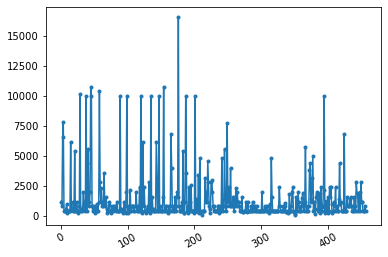

In [39]:

plt.plot(ppc_bag_grouped_dataset['Date'], ppc_bag_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()

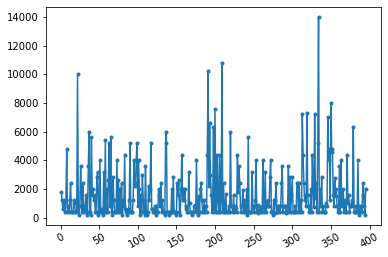

In [40]:
plt.plot(opc_bag_grouped_dataset['Date'], opc_bag_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()

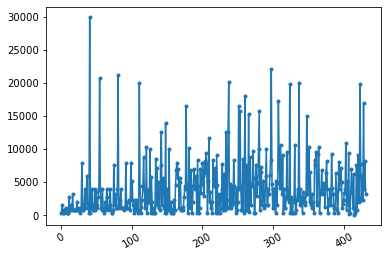

In [41]:
plt.plot(opc_bulk_grouped_dataset['Date'], opc_bulk_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()

In [42]:
opc_bulk_grouped_dataset.to_csv("opc_bulk_grouped_dataset.csv")

After smoothing

In [43]:
window = 40
ppc_bag_grouped_dataset['Quantity In Quintal']=moving_avarage_smoothing(ppc_bag_grouped_dataset['Quantity In Quintal'],window)
ppc_bag_grouped_dataset.to_csv("PPC_Bag_DailyCementSales.csv")
ppc_bag_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,0,1200.000000
1,2,0,1000.000000
2,3,0,2866.666667
3,4,0,4100.000000
4,5,0,3360.000000
...,...,...,...
451,452,0,1198.425000
452,453,0,1198.425000
453,454,0,1188.425000
454,455,0,1188.425000


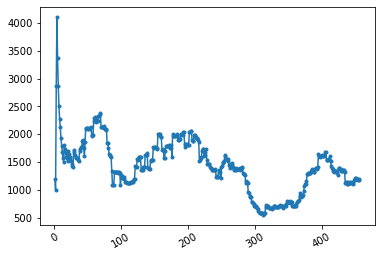

In [44]:
plt.plot(ppc_bag_grouped_dataset['Date'], ppc_bag_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()

In [45]:
opc_bag_grouped_dataset['Quantity In Quintal']=moving_avarage_smoothing(opc_bag_grouped_dataset['Quantity In Quintal'],window)
opc_bag_grouped_dataset.to_csv("OPC_Bag_DailyCementSales.csv")
opc_bag_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,1,1800.0
1,2,1,1500.0
2,3,1,1200.0
3,4,1,1150.0
4,5,1,1160.0
...,...,...,...
390,391,1,1509.4
391,392,1,1429.4
392,393,1,1374.4
393,394,1,1354.4


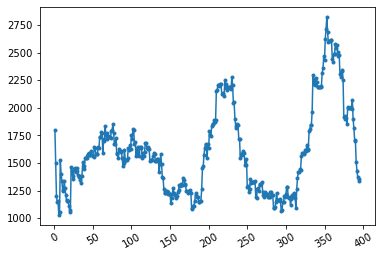

In [46]:
plt.plot(opc_bag_grouped_dataset['Date'], opc_bag_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()

In [47]:
opc_bulk_grouped_dataset['Quantity In Quintal']=moving_avarage_smoothing(opc_bulk_grouped_dataset['Quantity In Quintal'],window)
opc_bulk_grouped_dataset.to_csv("OPC_Bulk_DailyCementSales.csv")
opc_bulk_grouped_dataset

,Date,CementType,Quantity In Quintal
0,1,2,400.00000
1,2,2,1000.00000
2,3,2,800.00000
3,4,2,800.00000
4,5,2,720.00000
...,...,...,...
425,426,2,4132.91100
426,427,2,4182.91100
427,428,2,4577.96100
428,429,2,4517.16975


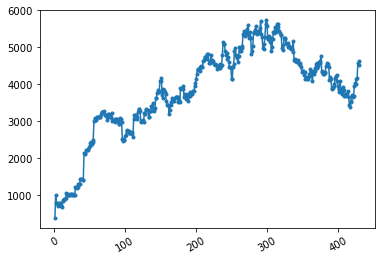

In [48]:
plt.plot(opc_bulk_grouped_dataset['Date'], opc_bulk_grouped_dataset['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.show()